# HSE 2023: Введение в машинное обучение БИ 23/24

## ДЗ 2

# Внимание!
Если в задании просят объяснить что-либо, то это значит, что требуется письменный ответ, который является частью задания и оценивается

Мы только принимаем ipynb ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
# from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Данные

Для этого ДЗ мы будем использовать датасет треков со стримингового сервиса Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Целевая переменная**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [7]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
columns = X.columns

In [8]:
data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Линейная регрессия

#### 0. [0.25 балла] Закодируйте категориальные признаки. Объясните выбранный вами метод.

In [9]:
# Кодируем категориальные признаки через One-Hot
# Избегаем вероятности случайно получить зависимости там где их нет

X = pd.get_dummies(X, columns=['track_genre', 'time_signature', 'mode', 'key'])
X.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,loudness,speechiness,acousticness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,-6.746,0.1430,0.0322,...,False,False,False,False,False,False,False,False,False,False
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,-17.235,0.0763,0.9240,...,False,False,False,False,False,False,False,False,False,False
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,-9.734,0.0557,0.2100,...,False,False,False,False,False,False,False,False,False,False
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,-18.515,0.0363,0.9050,...,False,False,False,False,False,False,False,False,False,False
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,-9.681,0.0526,0.4690,...,True,False,False,False,False,False,False,False,False,False


#### 1. [0.25 балла] Разбейте данные на train и test с пропорцией 75:25 и random_state=7. 

In [10]:
# Clean names and categorical
X_train, X_test, y_train, y_test = train_test_split(X[X.columns.difference([c for c in X.columns if any([p in c for p in ["artists", "album_name", "track_name", "key", "track_genre", "mode", "key", "time_signature"]])])], y, test_size=0.25, random_state=7)

In [11]:
X_train

,acousticness,danceability,duration_ms,explicit,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
7124,0.298000,0.4690,214213,False,0.000117,0.2660,-6.722,30,0.0348,187.124,0.8260
101347,0.000003,0.0832,88649,False,0.780000,0.3490,-19.851,40,0.1560,78.754,0.0000
70140,0.014800,0.7280,234226,False,0.001320,0.4850,-8.725,55,0.0309,123.960,0.3630
73606,0.157000,0.6960,476675,False,0.887000,0.1290,-12.063,43,0.0403,118.035,0.0359
38529,0.064700,0.5070,146747,False,0.000004,0.3000,-3.578,28,0.0450,124.026,0.6030
...,...,...,...,...,...,...,...,...,...,...,...
104003,0.169000,0.4800,181978,False,0.000000,0.0711,-4.013,0,0.0412,89.890,0.4520
10742,0.000543,0.2320,412066,False,0.041900,0.0983,-4.721,11,0.0667,163.923,0.6330
49689,0.006440,0.3900,280000,False,0.021300,0.4990,-5.979,21,0.0496,146.087,0.0450
58564,0.000030,0.6020,221213,False,0.945000,0.0917,-3.831,23,0.0660,145.003,0.5710


#### 2. [0.75 балла] Обучите модели на train'е, исключив категориальные признаки, используя библиотеку StatsModels и примените ее к test'у; используйте $RMSE$ и $R ^ 2$ в качестве метрики качества. Попробуйте также применить реализации линейной регрессии из sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.4$

Не забывайте скейлить данные с помощью StandardScaler перед обучением моделей! 

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

linreg_model = sm.OLS(y_train, X_train_scaled).fit()
y_pred = linreg_model.predict(X_test_scaled)

print(f"LinReg RMSE = {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"LinReg R^2 = {r2_score(y_test, y_pred)}")

LinReg RMSE = 0.12185674515925118
LinReg R^2 = 0.7636551517233063


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled = sm.add_constant(X_test_scaled)
X_train_scaled = sm.add_constant(X_train_scaled)

#  If L1_wt 0, the fit is a ridge fit
ridge_model = sm.OLS(y_train, X_train_scaled).fit_regularized(L1_wt=0, alpha=0.03)
y_pred = ridge_model.predict(X_test_scaled)

print(f"Ridge RMSE = {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Ridge R^2 = {r2_score(y_test, y_pred)}")

Ridge RMSE = 0.12328615979422775
Ridge R^2 = 0.758077844794014


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled = sm.add_constant(X_test_scaled)
X_train_scaled = sm.add_constant(X_train_scaled)

#  If L1_wt 1, the fit is a Lasso fit (default)
lasso_model = sm.OLS(y_train, X_train_scaled).fit_regularized(alpha=0.05)
y_pred = lasso_model.predict(X_test_scaled)

print(f"Lasso RMSE = {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Lasso R^2 = {r2_score(y_test, y_pred)}")

Lasso RMSE = 0.1549305357094485
Lasso R^2 = 0.6179492665303946


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled = sm.add_constant(X_test_scaled)
X_train_scaled = sm.add_constant(X_train_scaled)


enet_model = sm.OLS(y_train, X_train_scaled).fit_regularized(method='elastic_net', alpha=0.01, L1_wt=0.4)
y_pred = enet_model.predict(X_test_scaled)

print(f"ENet RMSE = {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"ENet R^2 = {r2_score(y_test, y_pred)}")

ENet RMSE = 0.1264167053284969
ENet R^2 = 0.7456358348744863


#### 3. [0.25 балла] Повторите шаги из предыдущего пункта, добавив категориальные признаки. Прокомментируйте изменения значений метрик качества

In [16]:
# Clean names, leave categoricals
X_train, X_test, y_train, y_test = train_test_split(X[X.columns.difference(["artists", "album_name", "track_name"])], y, test_size=0.25, random_state=7)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

linreg_model = sm.OLS(y_train, X_train_scaled).fit()
y_pred = linreg_model.predict(X_test_scaled)

print(f"LinReg RMSE = {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"LinReg R^2 = {r2_score(y_test, y_pred)}")

LinReg RMSE = 0.11186322274286672
LinReg R^2 = 0.8008310440515642


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled = sm.add_constant(X_test_scaled)
X_train_scaled = sm.add_constant(X_train_scaled)

#  If L1_wt 0, the fit is a ridge fit
ridge_model = sm.OLS(y_train, X_train_scaled).fit_regularized(L1_wt=0, alpha=0.03)
y_pred = ridge_model.predict(X_test_scaled)

print(f"Ridge RMSE = {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Ridge R^2 = {r2_score(y_test, y_pred)}")

Ridge RMSE = 0.11353346636642642
Ridge R^2 = 0.7948390089689181


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled = sm.add_constant(X_test_scaled)
X_train_scaled = sm.add_constant(X_train_scaled)

#  If L1_wt 1, the fit is a Lasso fit (default)
lasso_model = sm.OLS(y_train, X_train_scaled).fit_regularized(alpha=0.05)
y_pred = lasso_model.predict(X_test_scaled)

print(f"Lasso RMSE = {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Lasso R^2 = {r2_score(y_test, y_pred)}")

Lasso RMSE = 0.1549305357094485
Lasso R^2 = 0.6179492665303946


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled = sm.add_constant(X_test_scaled)
X_train_scaled = sm.add_constant(X_train_scaled)

enet_model = sm.OLS(y_train, X_train_scaled).fit_regularized(method='elastic_net', alpha=0.01, L1_wt=0.4)
y_pred = enet_model.predict(X_test_scaled)

print(f"ENet RMSE = {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"ENet R^2 = {r2_score(y_test, y_pred)}")

ENet RMSE = 0.12018233354992748
ENet R^2 = 0.7701056714887347


Пришло больше признаков, все методы дали лучшие метрики. Разница не убийственная, но она есть.

#### 4. [1 балл] Исследуйте значения параметров полученных моделей и проверьте какие веса получились нулевыми. Прокомментируйте значимость коэффициентов, обшую значимость модели и остальные факторы из результирующей таблицы 

In [35]:
def plot_weights(ax, features, weights):
    data = sorted(zip(weights, features), reverse=True)
    sns.barplot(x=[x[0] for x in data], y=[x[1] for x in data], ax=ax)

def plot_data(model):
    fig, axs = plt.subplots(figsize=(14, 20), ncols=1)
    plot_weights(axs, X_train.columns, model.params)

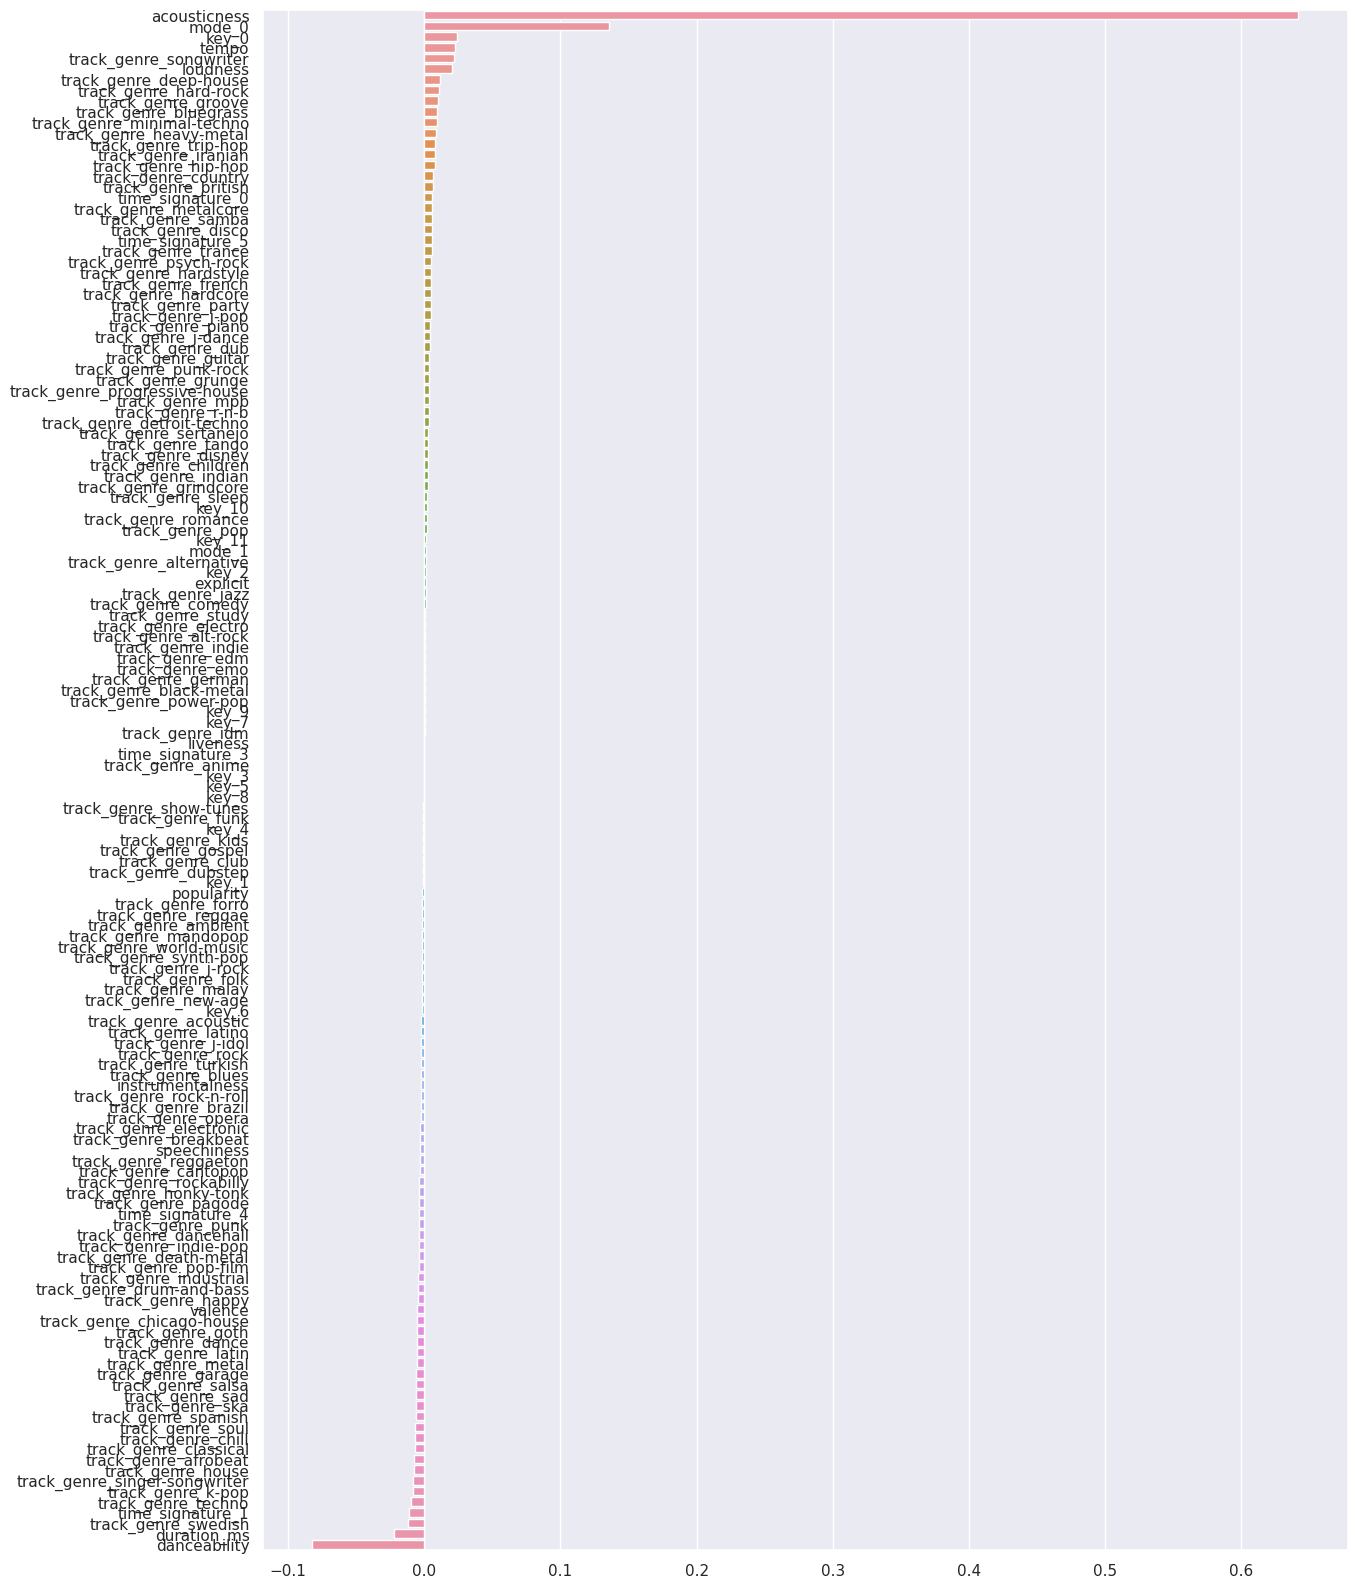

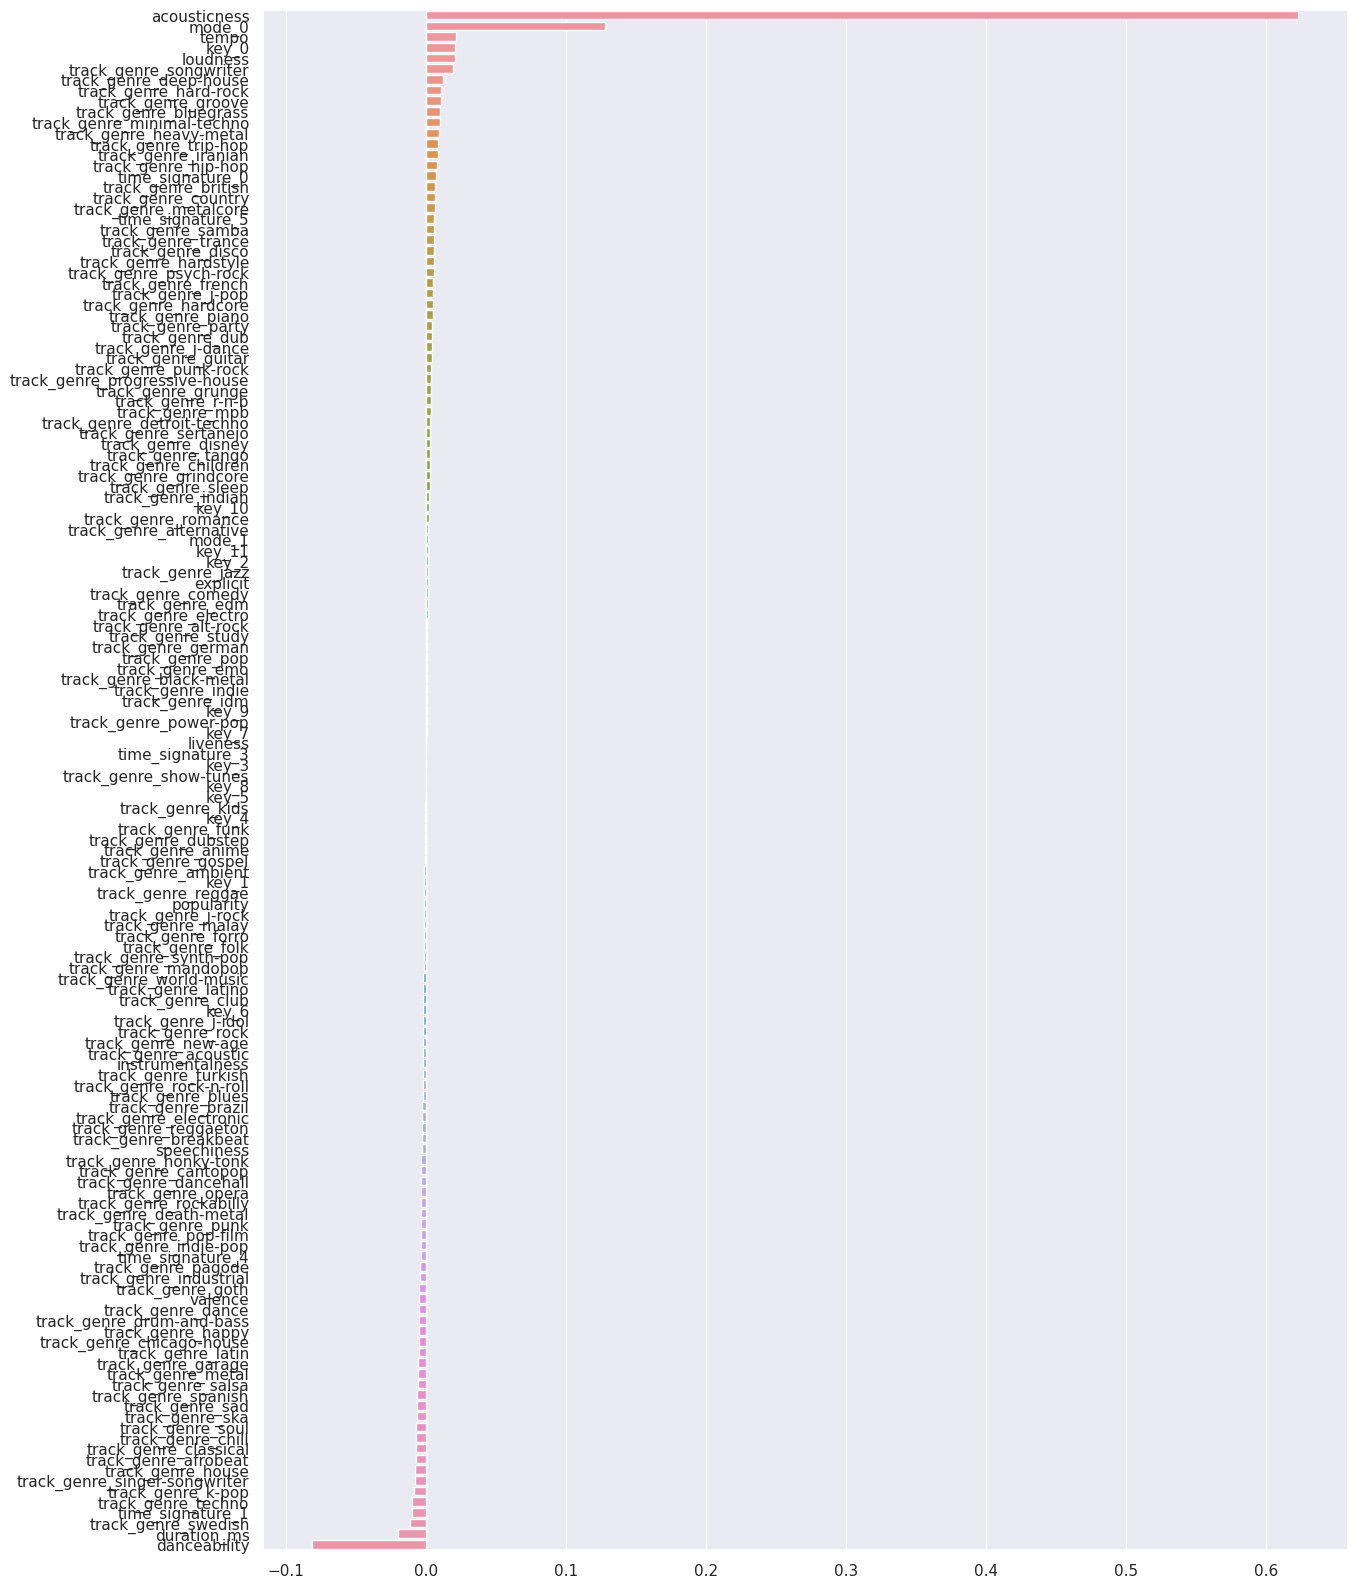

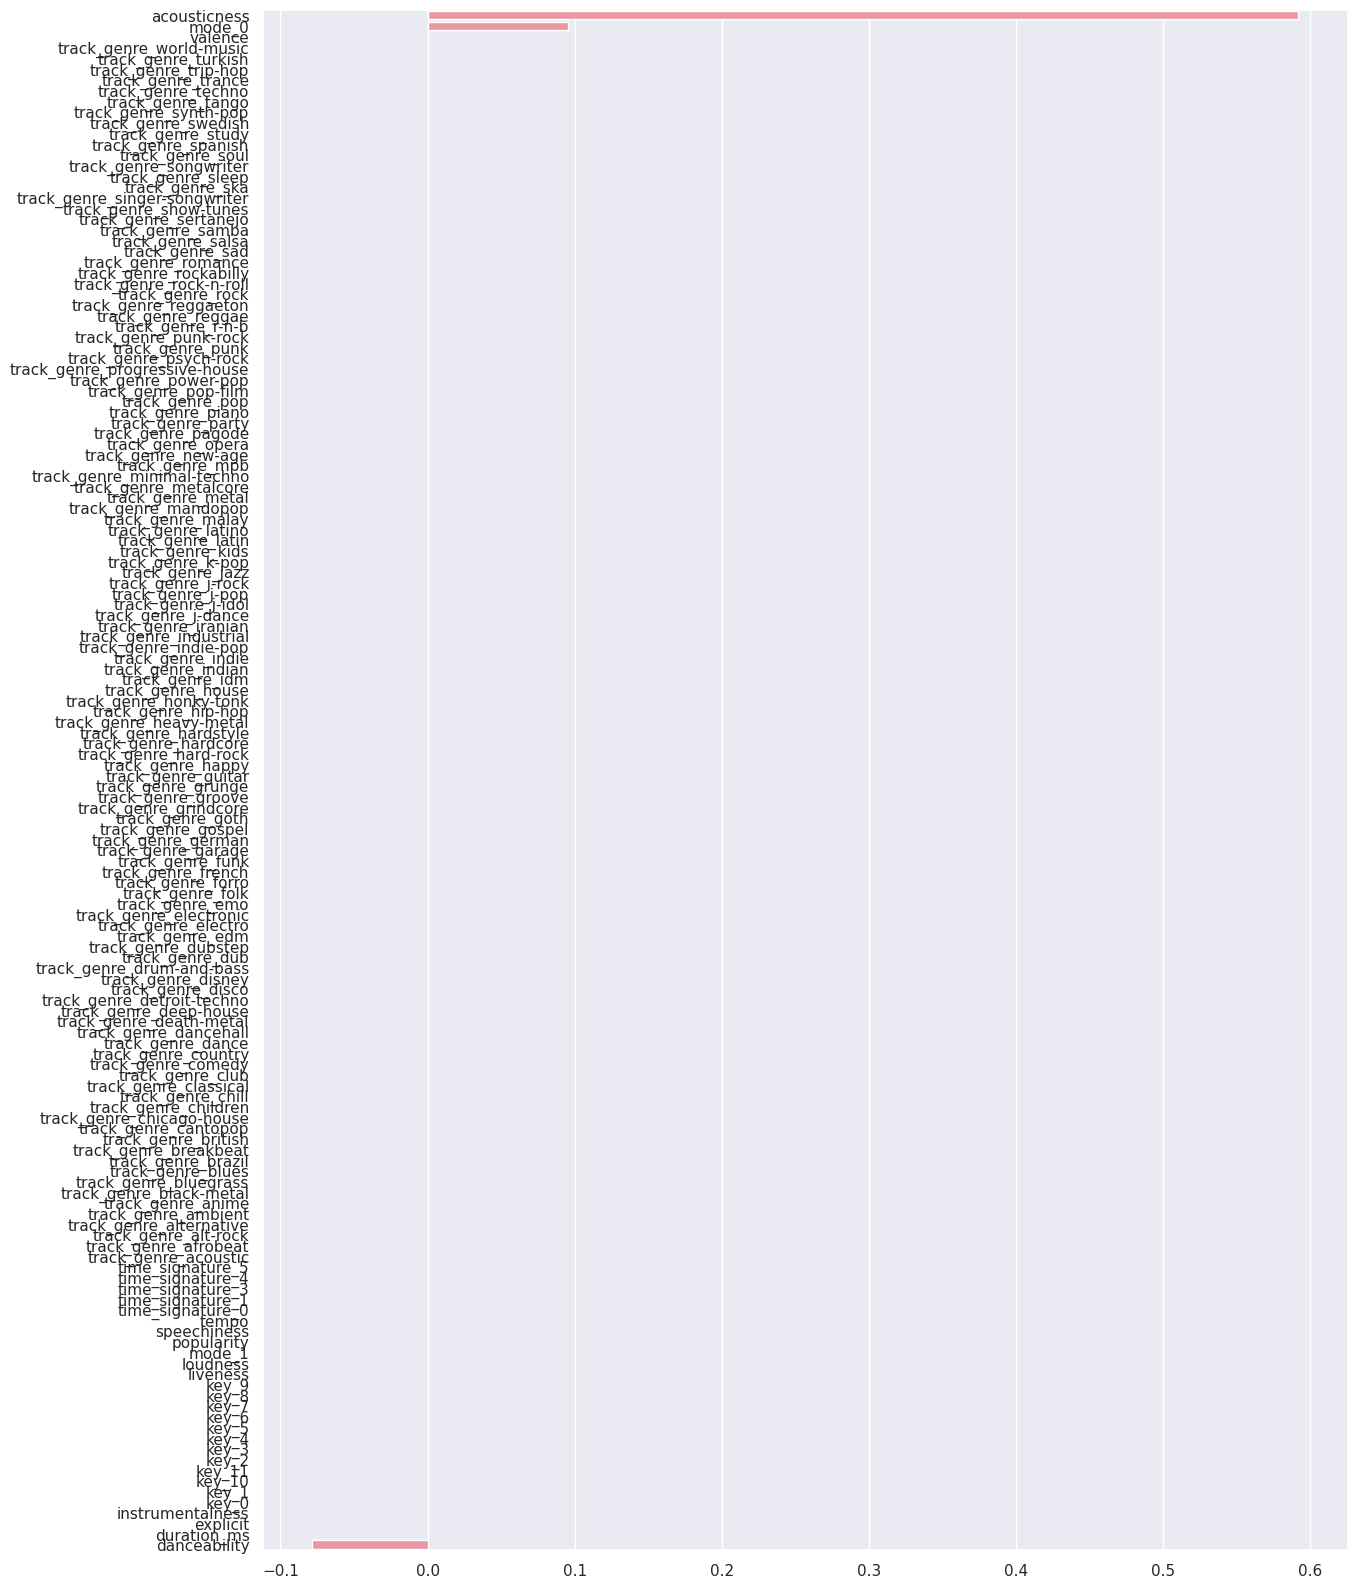

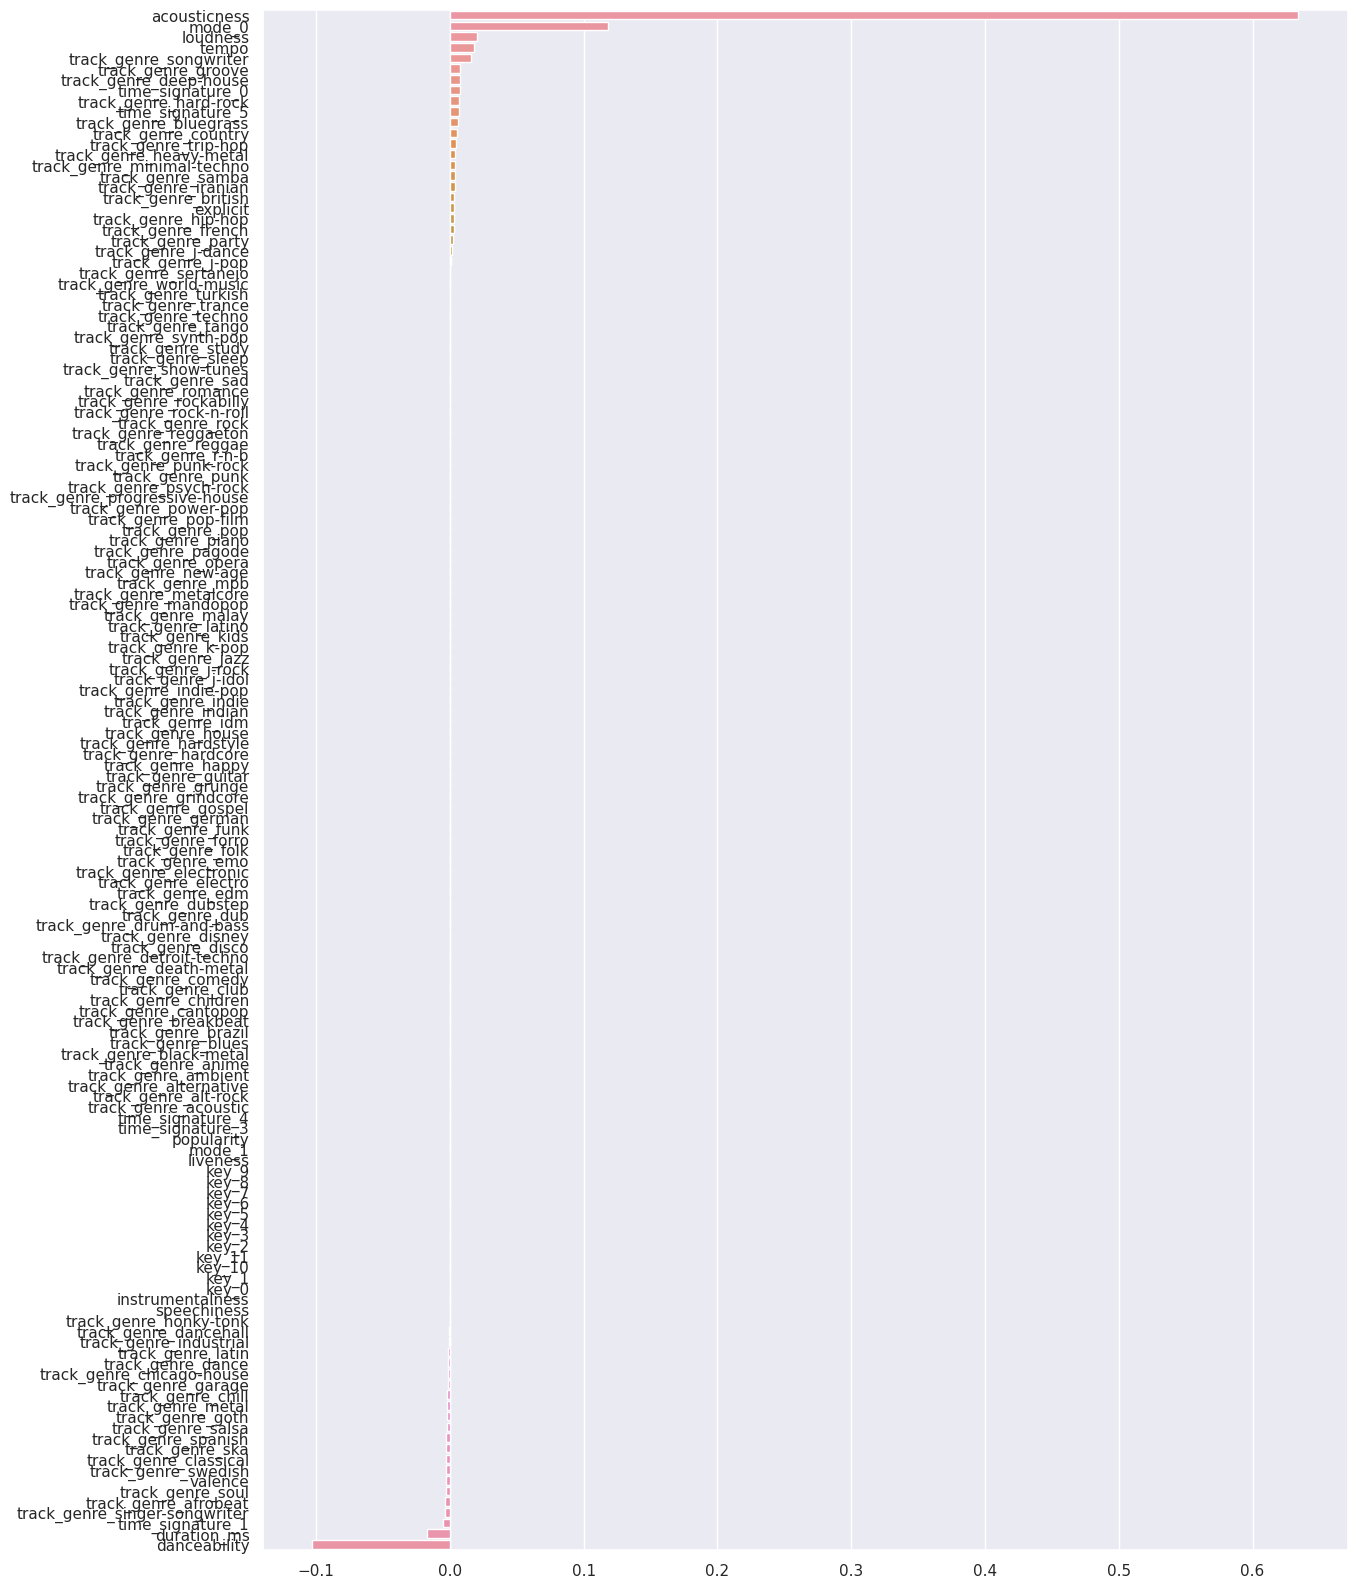

In [36]:
plot_data(linreg_model)
plot_data(ridge_model)
plot_data(lasso_model)
plot_data(enet_model)

Картина у моделей примерно одинаковая: важными параметрами является "акустичность" трека и оценка тго, насколько он подходит для танцев, минорные и громкие треки. У остальных параметров значение заметно выше. При этом Lasso/ENet модели заметно активнее зануляют признаки.

#### 5. [1 балл] Реализуйте один из алгоритмов отбора признаков (Elimination by P-value, Forward elimination, Backward elimination), сделайте выводы.

In [50]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
X = pd.get_dummies(X, columns=['track_genre', 'time_signature', 'mode', 'key'])

X_train, X_test, y_train, y_test = train_test_split(X[X.columns.difference(["artists", "album_name", "track_name"])], y, test_size=0.25, random_state=7)

In [66]:
# Backwards elimination

max_p = 0.03
eliminated = []

while True:
    X_train_eliminated = X_train[X_train.columns.difference(eliminated)]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_eliminated)

    X_train_scaled = sm.add_constant(X_train_scaled)

    rg = sm.OLS(y_train, X_train_scaled).fit()
    
    # Account for constant with 1:
    indexed_pvalues = sorted(list(enumerate(rg.pvalues))[1:], key=lambda x: x[1], reverse=True)

    if indexed_pvalues[0][1] <= max_p:
        print(rg.summary())
        break
    else:
        eliminated.append(X_train_eliminated.columns[indexed_pvalues[0][0] - 1])

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     2888.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:29:48   Log-Likelihood:                 66177.
No. Observations:               85500   AIC:                        -1.321e+05
Df Residuals:                   85378   BIC:                        -1.310e+05
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6420      0.000   1681.085      0.0

In [67]:
print(eliminated)

['time_signature_1', 'key_9', 'key_6', 'key_8', 'track_genre_ambient', 'track_genre_house', 'track_genre_pop-film', 'track_genre_anime', 'track_genre_garage', 'track_genre_electronic', 'track_genre_dubstep', 'track_genre_edm', 'track_genre_afrobeat', 'track_genre_indian', 'track_genre_spanish', 'track_genre_club', 'track_genre_j-rock', 'key_2', 'key_4', 'key_7', 'track_genre_alt-rock', 'key_3']


In [68]:
non_eliminated = [c for c in X_train.columns if c not in eliminated]
print(non_eliminated)

['acousticness', 'danceability', 'duration_ms', 'explicit', 'instrumentalness', 'key_0', 'key_1', 'key_10', 'key_11', 'key_5', 'liveness', 'loudness', 'mode_0', 'mode_1', 'popularity', 'speechiness', 'tempo', 'time_signature_0', 'time_signature_3', 'time_signature_4', 'time_signature_5', 'track_genre_acoustic', 'track_genre_alternative', 'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_breakbeat', 'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 'track_genre_chill', 'track_genre_classical', 'track_genre_comedy', 'track_genre_country', 'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 'track_genre_detroit-techno', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 'track_genre_dub', 'track_genre_electro', 'track_genre_emo', 'track_genre_folk', 'track_genre_forro', 'track_genre_french', 'track_genre_funk', 'tra

Информация о нотах бесполезна, многие жанры тоже не имеют значения. Остальные параметры, даже если их вес мал, актуальны.

#### 6. [1 балл] Найдите лучший (по RMSE) $\alpha$ для регрессиии Lasso, используя кросс-валидацию на 5 фолдов. Вы должны выбрать значение из промежутка $[10^{-4}, 10^{3}]$.

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[non_eliminated])
X_test_scaled = scaler.transform(X_test[non_eliminated])

alphas = np.logspace(-4, 3, 50)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring=mean_squared_error, cv=5)
searcher.fit(X_train_scaled, y_train)

print(f"Best alpha = {searcher.best_params_['alpha']}")

Best alpha = 0.0001


## Градиентный спуск

#### 7. [3.5 балла] Имплементируйте  Ridge регрессию для MSE loss, обученную на градиентом спуске.


Все вычисления должны быть векторизованы, а циклы Python можно использовать только для итераций градиентного спуска. В качестве критерия остановки необходимо использовать (одновременно):

* проверка абсолютной нормы разницы весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, заданного параметром `tolerance`);

* достижение максимального количества итераций (например, 10000, заданного параметром `max_iter`).

Вам необходимо выполнить:

* Полный градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Стохастический градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ является оценкой градиента по набору объектов, выбранных случайным образом.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

Чтобы убедиться, что процесс оптимизации действительно выполняется, мы будем использовать атрибут класса `loss_history`. После вызова метода fit он должен содержать значения функции потерь для всех итераций, начиная с первой (до первого шага по антиградиенту).


Вам нужно инициализировать веса случайным вектором из нормального распределения. Ниже приведен шаблон, который должен содержать код, реализующий все варианты моделей.

In [166]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-3, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """
        
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None
        self.h = 0
        self.g = 0
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """

        y = y.to_numpy()

        self.w = np.copy(self.w0)
        self.loss_history = []

        np.random.seed(42)

        for i in range(self.max_iter):
            self.calc_loss(X, y)
            diff = self.step(X, y, i)

            if (diff*diff).sum() ** (1/2) < self.tolerance:
                break
            
        return self
    
    def predict(self, X):
        if np.nan in self.w:
            print(self.w)
            raise Exception()

        return X @ self.w
    
    def step(self, X, y, it):
        return self.update_weights(self.calc_gradient(X, y), it)

    def update_weights(self, X, iteration):
        if self.gd_type == 'Momentum':
            self.h = self.alpha * self.h + self.eta * X
            self.w -= self.h

            if np.nan in self.w:
                print(self.h)
                raise Exception()

            return self.h
        elif self.gd_type == 'Adagrad':
            self.g += X * X
            wdiff = self.eta * X / np.sqrt(self.g + 1e-8)
            self.w -= wdiff
            return wdiff
        else:
            self.w -= self.eta * X

            if np.nan in self.w:
                raise Exception()

            return self.eta * X

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """

        if self.gd_type == 'StochasticDescent':
            batch = np.random.choice(X.shape[0], len(X) // 100, replace=False)
            batch_X = X[batch,:]
            batch_y = y[batch]
            err = self.predict(batch_X) - batch_y

            return 2 * (batch_X.T @ err) / len(batch_y)
        else:
            err = self.predict(X) - y

            return 2 * (X.T @ err) / len(y)
        

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        
        self.loss_history.append(mean_squared_error(self.predict(X), y))

#### 8. [1 балл] Натренируйте и провалидируйте "ручные" модели на тех же даннных, сравните качество с моделями из Sklearn и StatsModels. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Соответствует ли оно вашим ожиданиям?

In [83]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
X = pd.get_dummies(X, columns=['track_genre', 'time_signature', 'mode', 'key'])

X_train, X_test, y_train, y_test = train_test_split(X[X.columns.difference(["artists", "album_name", "track_name"] + eliminated)], y, test_size=0.25, random_state=7)

In [167]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinReg(w0=np.zeros(len(X_train.columns)))
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(f"RMSE = {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R^2 = {r2_score(y_test, y_pred)}")

RMSE = 0.6535538066205353
R^2 = -5.79844658643927


Наша модель, ожидаемо, хуже. Зато наша, а не импортная, мало ли с чем там ее растили.

#### 9. [1 балл] Постройте графики (там же) зависимости значения функции потерь от номера итерации для всех моделей (полного градиентого спуска, стохастического гс, Momentum и Adagrad). Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.


Не забывайте о том, как должен выглядеть *красивый* график!

<Axes: >

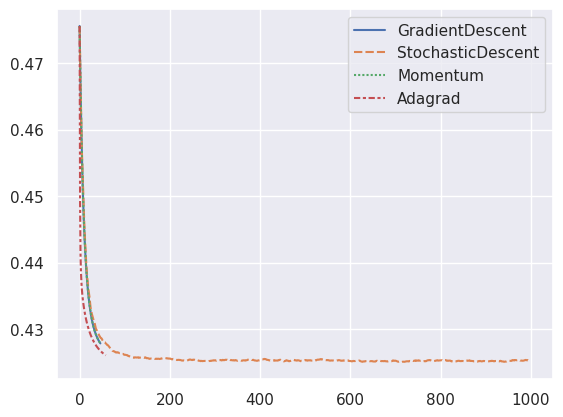

In [169]:
data = {}

for gd_type in ['GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad']:
    model = LinReg(w0=np.zeros(len(X_train.columns)), gd_type=gd_type)
    model.fit(X_train_scaled, y_train)

    data[gd_type] = model.loss_history

sns.lineplot(data)

Выглядит так, словно StochasticDescent за счет случайной выборки после резкого спуска на первых итерациях (где остальные модели останавливаются, т.к. дальше diff минимален) продолжает как-то случайно дергать веса без особого улучшения. Возможно, там надо как-то доработать механизм остановки, иначе сходимость будет очень долгой.